## Tratamento dos dados

In [ ]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("tips.csv")

In [3]:
df

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [4]:
#Troca dos nomes da colunas
renomear = {
    'total_bill' : 'valor_da_conta',
    'tip' : 'gorjeta',
    'dessert' : 'sobremesa',
    'day' : 'dia_da_semana',
    'time' : 'hora_do_dia',
    'size' : 'total_de_pessoas'
}

In [5]:
df_gorjetas = df.rename(columns = renomear)

In [6]:
df_gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [7]:
df_gorjetas.sobremesa.unique() # opções da coluna sobremesa

array(['No', 'Yes'], dtype=object)

In [8]:
#Trocando para portugues
df_gorjetas.sobremesa = df_gorjetas.sobremesa.apply(lambda x: "Não" if x == "No" else "Sim")

In [9]:
df_gorjetas.sobremesa.unique()

array(['Não', 'Sim'], dtype=object)

In [10]:
#Verificar as opções da coluna hora do dia
df_gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [11]:
df_gorjetas.hora_do_dia = df_gorjetas.hora_do_dia.apply(lambda x: "Jantar" if x == "Dinner" else "Almoço")

In [12]:
df_gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

In [13]:


#Verificar os dias da semana
df_gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [14]:
dia = {'Sun': "Domingo", 'Sat': "Sábado", 'Thur': "Quinta", 'Fri': "Sexta"}
df_gorjetas.dia_da_semana = df_gorjetas.dia_da_semana.map(dia)

In [15]:
df_gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

In [16]:
df_gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Jantar,3
240,27.18,2.00,Sim,Sábado,Jantar,2
241,22.67,2.00,Sim,Sábado,Jantar,2
242,17.82,1.75,Não,Sábado,Jantar,2


---
## Analise 1 - Valor da conta e Gorjeta


In [17]:
#Verificar quais são as colunas
df_gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

In [18]:
registros, colunas = df_gorjetas.shape
print(f"A base de dados contem {registros} registros.")

A base de dados contem 244 registros.


In [19]:
#informações sobre a base de dados se existe dados nulos
df_gorjetas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valor_da_conta    244 non-null    float64
 1   gorjeta           244 non-null    float64
 2   sobremesa         244 non-null    object 
 3   dia_da_semana     244 non-null    object 
 4   hora_do_dia       244 non-null    object 
 5   total_de_pessoas  244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


In [20]:
df_gorjetas.describe().round(2)

,valor_da_conta,gorjeta,total_de_pessoas
count,244.00,244.00,244.00
mean,19.79,3.00,2.57
std,8.90,1.38,0.95
min,3.07,1.00,1.00
25%,13.35,2.00,2.00
50%,17.80,2.90,2.00
75%,24.13,3.56,3.00
max,50.81,10.00,6.00


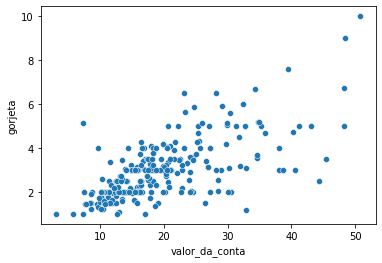

In [21]:
valores_gorjeta = sns.scatterplot(x="valor_da_conta", y="gorjeta", data=df_gorjetas)

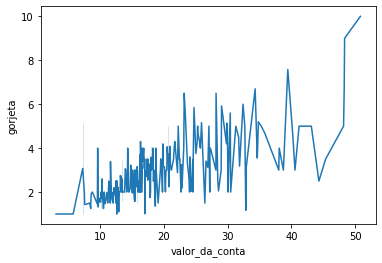

In [22]:
valores_gorjeta_boxplot = sns.lineplot(x="valor_da_conta", y="gorjeta", data=df_gorjetas)

---
## Calculando porcentagem do valor da gorjeta em relação ao valor da conta

In [23]:
df_gorjetas["porcentagem"] = ((df_gorjetas.gorjeta / df_gorjetas.valor_da_conta) * 100).round(2)

In [24]:
df_gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,5.94
1,10.34,1.66,Não,Domingo,Jantar,3,16.05
2,21.01,3.50,Não,Domingo,Jantar,3,16.66
3,23.68,3.31,Não,Domingo,Jantar,2,13.98
4,24.59,3.61,Não,Domingo,Jantar,4,14.68
...,...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Jantar,3,20.39
240,27.18,2.00,Sim,Sábado,Jantar,2,7.36
241,22.67,2.00,Sim,Sábado,Jantar,2,8.82
242,17.82,1.75,Não,Sábado,Jantar,2,9.82


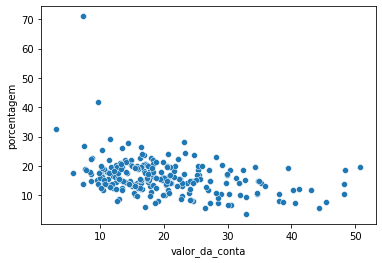

In [25]:
porcentagem_da_conta = sns.scatterplot(x="valor_da_conta", y="porcentagem", data=df_gorjetas)

---
## Analise 2 - Sobremesa

In [26]:
df_gorjetas[df_gorjetas.sobremesa == "Sim"].describe().round(2)

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.00,93.00,93.00,93.00
mean,20.76,3.01,2.41,16.32
std,9.83,1.40,0.81,8.51
min,3.07,1.00,1.00,3.56
25%,13.42,2.00,2.00,10.68
50%,17.92,3.00,2.00,15.38
75%,26.86,3.68,3.00,19.51
max,50.81,10.00,5.00,71.03


In [27]:
df_gorjetas[df_gorjetas.sobremesa == "Não"].describe().round(2)

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.00,151.00,151.00,151.00
mean,19.19,2.99,2.67,15.93
std,8.26,1.38,1.02,3.99
min,7.25,1.00,1.00,5.68
25%,13.32,2.00,2.00,13.69
50%,17.59,2.74,2.00,15.56
75%,22.76,3.50,3.00,18.50
max,48.33,9.00,6.00,29.20


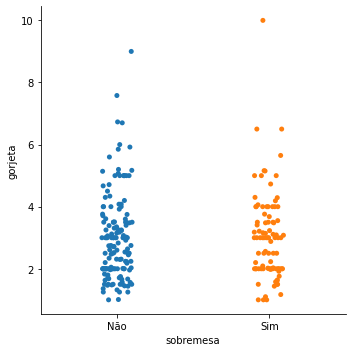

In [28]:
sobremesa_gorjeta = sns.catplot(x="sobremesa", y="gorjeta", data=df_gorjetas)

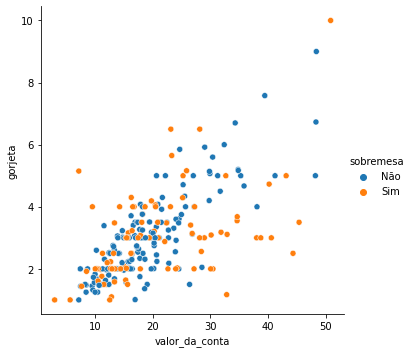

In [29]:
sobremesa_gorjeta = sns.relplot(x="valor_da_conta", y="gorjeta", hue="sobremesa", data=df_gorjetas)

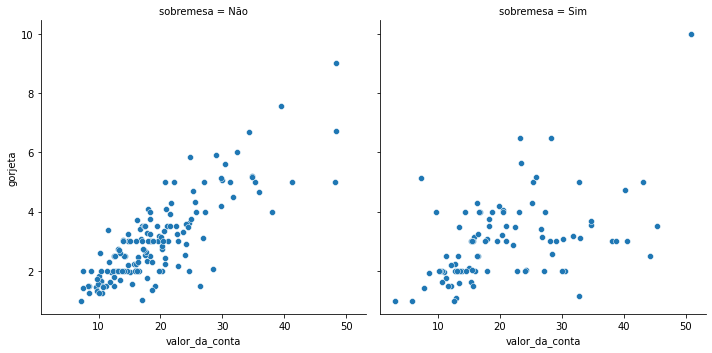

In [30]:
sobremesa_gorjeta = sns.relplot(x="valor_da_conta", y="gorjeta", col="sobremesa", data=df_gorjetas)

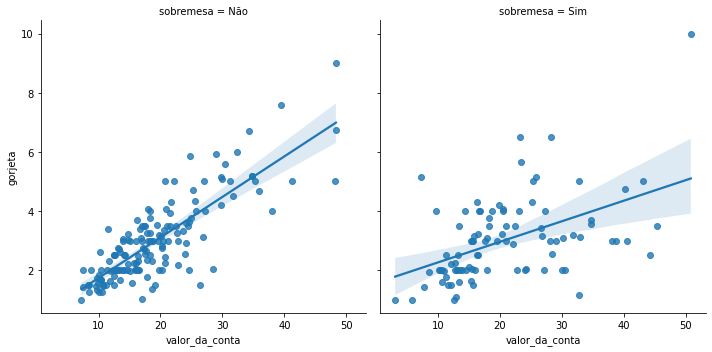

In [31]:
sobremesa_gorjeta = sns.lmplot(x="valor_da_conta", y="gorjeta", col="sobremesa", data=df_gorjetas)

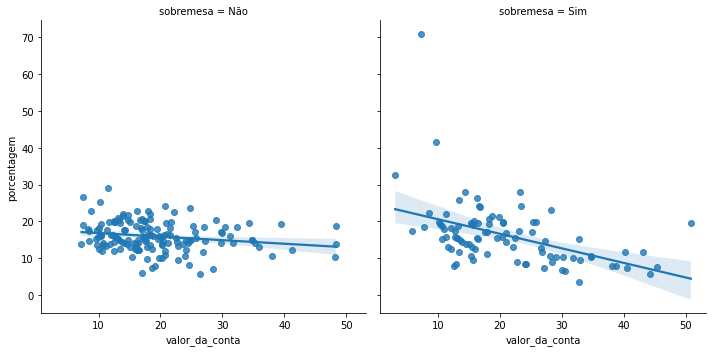

In [32]:
sobremesa_gorjeta = sns.lmplot(x="valor_da_conta", y="porcentagem", col="sobremesa", data=df_gorjetas)

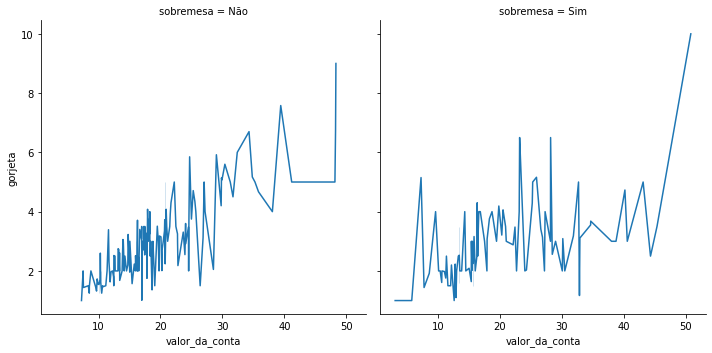

In [33]:
sobremesa_gorjeta = sns.relplot(x="valor_da_conta", y="gorjeta", col="sobremesa", kind="line", data=df_gorjetas)

* Teste de hipotese

In [34]:
from scipy.stats import ranksums

In [35]:
com_sobremesa = df_gorjetas.query("sobremesa == 'Sim'").porcentagem
sem_sobremesa = df_gorjetas.query("sobremesa == 'Não'").porcentagem
teste_hipotese = ranksums(com_sobremesa, sem_sobremesa)
print(f"O resultado do teste de hipotese é {teste_hipotese.pvalue.round(2)}")

O resultado do teste de hipotese é 0.56


---
## Analise 3 - Dia da semana

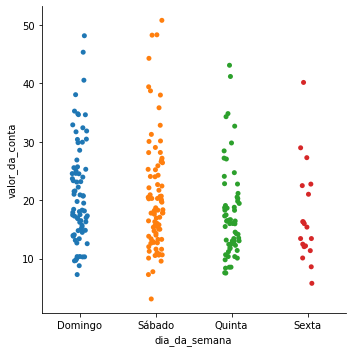

In [36]:
dia_da_semana_gorjeta = sns.catplot(x='dia_da_semana', y='valor_da_conta', data=df_gorjetas)

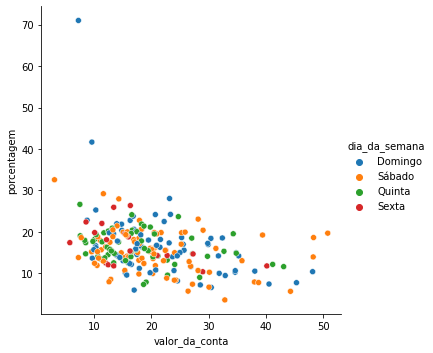

In [38]:
dia_da_semana_gorjeta = sns.relplot(hue='dia_da_semana', x="valor_da_conta", y="porcentagem", data=df_gorjetas)

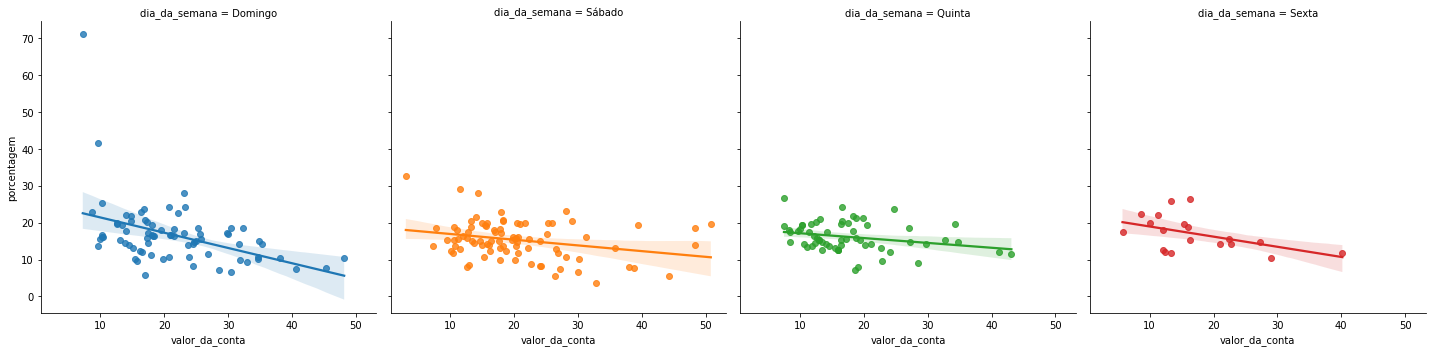

In [42]:
dia_da_semana_gorjeta = sns.lmplot(hue='dia_da_semana', x="valor_da_conta", y="porcentagem", col="dia_da_semana", data=df_gorjetas)

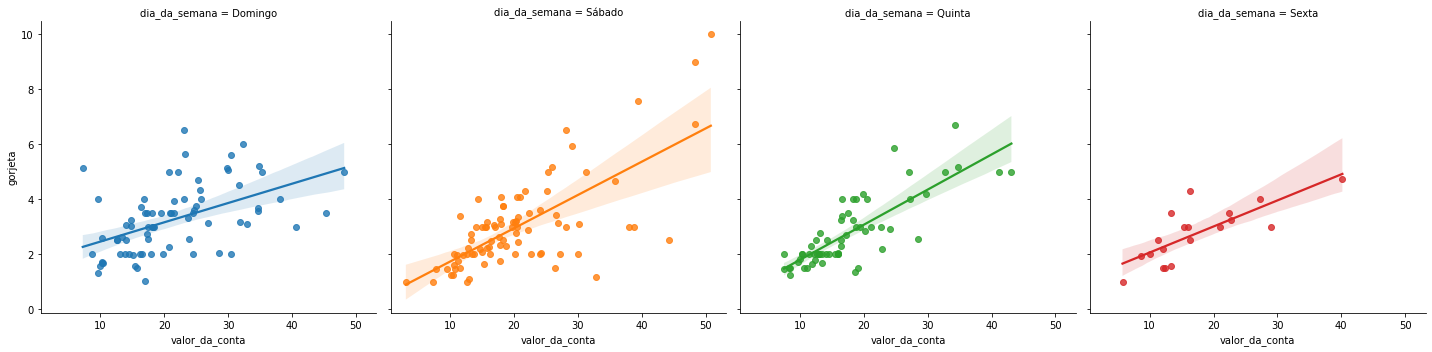

In [41]:
dia_da_semana_gorjeta = sns.lmplot(hue='dia_da_semana', x="valor_da_conta", y="gorjeta", col="dia_da_semana", data=df_gorjetas)

---
## Analise geral

In [45]:
media_geral_gorjeta = df_gorjetas.gorjeta.mean().round(2)

In [46]:
print(f"Valor da média geral: {media_geral_gorjeta}")

Valor da média geral: 3.0


In [49]:
df_gorjetas.groupby("dia_da_semana").mean().round(2).drop("total_de_pessoas", axis=1)

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.41,3.26,16.69
Quinta,17.68,2.77,16.13
Sexta,17.15,2.73,16.99
Sábado,20.44,2.99,15.31


In [51]:
df_gorjetas.dia_da_semana.value_counts()

Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

* Teste de Hipotese

In [56]:
valor_da_conta_domingo = df_gorjetas[df_gorjetas.dia_da_semana == "Domingo"].valor_da_conta
valor_da_conta_sabado = df_gorjetas[df_gorjetas.dia_da_semana == "Sábado"].valor_da_conta

In [57]:
teste_hipotese_valor_conta = ranksums(valor_da_conta_domingo, valor_da_conta_sabado)

In [59]:
print(f"Resultado do teste de hipotese: {teste_hipotese_valor_conta.pvalue}")

Resultado do teste de hipotese: 0.3576728477868443
